<a href="https://colab.research.google.com/github/birusolankar/Pyspark-Bigdata/blob/main/Pyspark_day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=06534c63e2cba43dd607db8b08b973cdc48f8a3a0ec181ba1e51ada59b89fdf6
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
# importing spark session
from pyspark.sql import SparkSession

In [ ]:
# building spark application
spark = SparkSession.builder.appName("day_6").getOrCreate()

In [ ]:
spark

In [ ]:
df = spark.read.csv("/content/appl_stock.csv", header = True, inferSchema= True)

In [ ]:
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
df.show(15, truncate =False)

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|Date      |Open              |High              |Low               |Close             |Volume   |Adj Close         |
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|213.429998        |214.499996        |212.38000099999996|214.009998        |123432400|27.727039         |
|2010-01-05|214.599998        |215.589994        |213.249994        |214.379993        |150476200|27.774976000000002|
|2010-01-06|214.379993        |215.23            |210.750004        |210.969995        |138040000|27.333178000000004|
|2010-01-07|211.75            |212.000006        |209.050005        |210.58            |119282800|27.28265          |
|2010-01-08|210.299994        |212.000006        |209.06000500000002|211.98000499999998|111902700|27.464034         |
|2010-01-11|212.79999700000002|213.000002        |208.45

In [ ]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
from pyspark.sql.functions import col

In [ ]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [ ]:
df.dtypes

[('Date', 'date'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Volume', 'int'),
 ('Adj Close', 'double')]

In [ ]:
df.orderBy("Date", ascending = False).show(5)

+----------+----------+----------+----------+----------+--------+------------------+
|      Date|      Open|      High|       Low|     Close|  Volume|         Adj Close|
+----------+----------+----------+----------+----------+--------+------------------+
|2016-12-30|116.650002|117.199997|    115.43|    115.82|30586300|         115.32002|
|2016-12-29|116.449997|117.110001|116.400002|116.730003|15039500|        116.226096|
|2016-12-28|117.519997|118.019997|116.199997|116.760002|20905900|116.25596499999999|
|2016-12-27|116.519997|117.800003|116.489998|117.260002|18296900|116.75380600000001|
|2016-12-23|115.589996|116.519997|115.589996|116.519997|14249500|        116.016995|
+----------+----------+----------+----------+----------+--------+------------------+
only showing top 5 rows



In [ ]:
df.select("Date").show(5)

+----------+
|      Date|
+----------+
|2010-01-04|
|2010-01-05|
|2010-01-06|
|2010-01-07|
|2010-01-08|
+----------+
only showing top 5 rows



In [ ]:
# how do we get last five record

In [ ]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [ ]:
new_df = df.describe()

In [ ]:
from pyspark.sql.functions import format_number

In [ ]:
new_df.select("summary", format_number(new_df["Open"].cast("float"), 2).alias("Open")).show()

+-------+--------+
|summary|    Open|
+-------+--------+
|  count|1,762.00|
|   mean|  313.08|
| stddev|  185.30|
|    min|   90.00|
|    max|  702.41|
+-------+--------+



In [ ]:
# lets get the ratio of high nad volumn
df.withColumn("HV Rtaio", df["High"]/df["Volume"]).show(5)

+----------+----------+----------+------------------+------------------+---------+------------------+--------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|            HV Rtaio|
+----------+----------+----------+------------------+------------------+---------+------------------+--------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|1.737793286041590...|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|1.432718223878593...|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|1.559185743262822...|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|1.777288980473295...|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|1.894503045949740...|
+----------+----

In [ ]:
# which day had the highest peak
# Method-01
df.orderBy("High", ascending = False).show(1)

+----------+----------+----------+-----------------+----------+---------+---------+
|      Date|      Open|      High|              Low|     Close|   Volume|Adj Close|
+----------+----------+----------+-----------------+----------+---------+---------+
|2012-09-21|702.409988|705.070023|699.3599849999999|700.089989|142897300| 91.09278|
+----------+----------+----------+-----------------+----------+---------+---------+
only showing top 1 row



In [ ]:
# Method- 02
df.orderBy(df["High"].desc()).show(2)

+----------+----------+----------+-----------------+----------+---------+-----------------+
|      Date|      Open|      High|              Low|     Close|   Volume|        Adj Close|
+----------+----------+----------+-----------------+----------+---------+-----------------+
|2012-09-21|702.409988|705.070023|699.3599849999999|700.089989|142897300|         91.09278|
|2012-09-19|700.259979|703.989998|       699.569977|702.100021| 81718700|91.35431700000001|
+----------+----------+----------+-----------------+----------+---------+-----------------+
only showing top 2 rows



In [ ]:
from pyspark.sql import functions as f

In [ ]:
# Method-3
df.select(f.max("High")).show()

+----------+
| max(High)|
+----------+
|705.070023|
+----------+



In [ ]:
# Method-4
df.agg({'High': 'max'}).show()

+----------+
| max(High)|
+----------+
|705.070023|
+----------+



In [ ]:
# mean of close column
df.agg({'Close': 'mean'}).show()

+-----------------+
|       avg(Close)|
+-----------------+
|312.9270656379113|
+-----------------+



In [ ]:
# return only those record where close price is less than 60
# Method-1
df.filter("Close < 60").show()

+----+----+----+---+-----+------+---------+
|Date|Open|High|Low|Close|Volume|Adj Close|
+----+----+----+---+-----+------+---------+
+----+----+----+---+-----+------+---------+



In [ ]:
# Method-2
df.filter(df["Close"] < 60).show(10)

+----+----+----+---+-----+------+---------+
|Date|Open|High|Low|Close|Volume|Adj Close|
+----+----+----+---+-----+------+---------+
+----+----+----+---+-----+------+---------+



In [ ]:
df.filter(df.Close < 60).count()

0

In [ ]:
# fetch all those records in which close price lie between 60 and 80
df.filter((df["Close"] > 60) & (df["close"] < 80)).show()

+----+----+----+---+-----+------+---------+
|Date|Open|High|Low|Close|Volume|Adj Close|
+----+----+----+---+-----+------+---------+
+----+----+----+---+-----+------+---------+



In [ ]:
# find the number of records which lie Close price above 60
df.filter(df["Close"] < 60).agg({'Close': 'count'}).show()

+------------+
|count(Close)|
+------------+
|           0|
+------------+



In [ ]:
# what percentage of time the high price is greater than 80

# count of price higher than 80/ total number of records *100

df.filter("High > 80").count()

1762

In [ ]:
# total number of records
df.select("Date").count()

1762

In [ ]:
# find ratio
round(df.filter("High > 80").count()/df.select("Date").count() *100, 2)

100.0

In [ ]:
# Pearson correlation
# how columns are correlated each other
df.select(f.corr('High', 'Open')).show()

+------------------+
|  corr(High, Open)|
+------------------+
|0.9998664459840495|
+------------------+



In [ ]:
df.show(10)

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
#df = spark.read.csv("/content/window_function_1.csv", header = True, inferSchema= True)

In [ ]:
#df.show()

In [ ]:
#from pyspark.sql.window import Window

In [ ]:
#window_spec = Window.orderBy(f.desc("Score"))

In [ ]:
# apply this window spec on DF
#df.show()

# Row number

In [ ]:
# row number ---> it gives the ranking consecutively
#df.withColumn("Row_number", f.row_number().over(window_spec)).show()

# Rank

In [ ]:
# rank----> it gives the ranks with skipping as follows
#df.withColumn("rank", f.rank().over(window_spec)).show()

# Dense rank

In [ ]:
# Dense rank---> it gives the ranking withing skipping along the same rank
#df.withColumn("dense_rank", f.dense_rank().over(window_spec)).show()

In [ ]:
#df.withColumn("Row_number", f.row_number().over(window_spec)).\
#withColumn("rank", f.rank().over(window_spec)).\
#withColumn("dense_rank", f.dense_rank().over(window_spec)).show()

In [ ]:
#help(df.groupBy)

In [ ]:
#df.groupBy('Country').agg({'Score':'sum'}).sort('Country').show()

In [ ]:
# partition of data by Country and then sort them and find their rank and dense_rank and row_number
#window_country = Window.partitionBy(df['Country']).orderBy(f.desc("Score"))

In [ ]:
#df.withColumn("rank", f.rank().over(window_country)).\
#withColumn("dense_rank", f.dense_rank().over(window_country)).\
#withColumn("row_number", f.row_number().over(window_country)).show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
data = df.select('Date', 'Open').toPandas()

<Axes: xlabel='Date'>

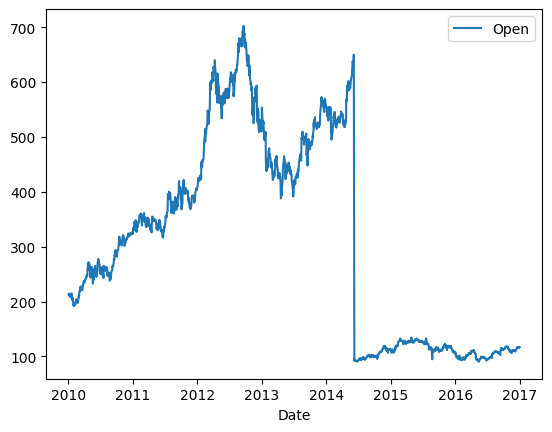

In [ ]:
data.plot.line(x='Date', y='Open')

In [ ]:
from pyspark.sql.functions import date_format


In [ ]:
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
df.groupby('Date')

In [ ]:
data = df.select('Date', 'Close').toPandas()

<Axes: xlabel='Date'>

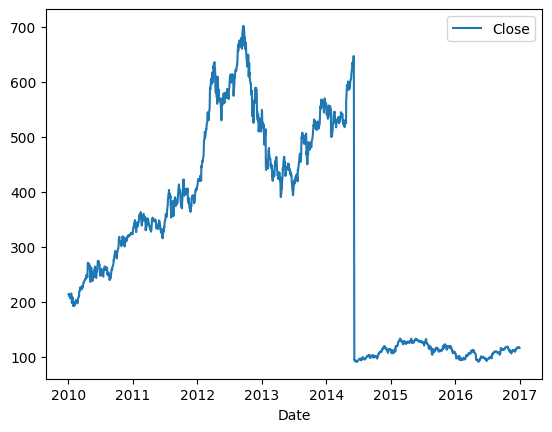

In [ ]:
data.plot.line(x='Date', y='Close')
